In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from vega_datasets import data
%matplotlib inline
df = data.sf_temps()

In [15]:
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [16]:
df['month'] = df.date.dt.month

In [17]:
df['weekday'] = df.date.dt.day_name()
df.weekday.value_counts()

Friday       1272
Saturday     1248
Monday       1248
Tuesday      1248
Wednesday    1248
Thursday     1248
Sunday       1247
Name: weekday, dtype: int64

In [18]:
df = df.set_index('date').sort_index()
df

,temp,month,weekday
date,,,
2010-01-01 00:00:00,47.8,1,Friday
2010-01-01 01:00:00,47.4,1,Friday
2010-01-01 02:00:00,46.9,1,Friday
2010-01-01 03:00:00,46.5,1,Friday
2010-01-01 04:00:00,46.0,1,Friday
...,...,...,...
2010-12-31 19:00:00,50.4,12,Friday
2010-12-31 20:00:00,49.9,12,Friday
2010-12-31 21:00:00,49.4,12,Friday


# Question 1:
## Resample by the day and take the average temperature. Visualize the average temperature over time.

In [27]:
day_resample = df.temp.resample('D').mean()

In [28]:
day_resample

date
2010-01-01    49.170833
2010-01-02    49.304167
2010-01-03    49.391667
2010-01-04    49.445833
2010-01-05    49.491667
                ...    
2010-12-27    48.991667
2010-12-28    49.000000
2010-12-29    49.012500
2010-12-30    49.012500
2010-12-31    49.116667
Freq: D, Name: temp, Length: 365, dtype: float64

<AxesSubplot:xlabel='date'>

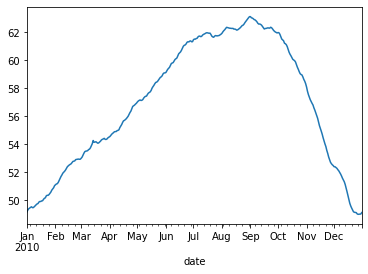

In [29]:
day_resample.plot()

# Question 2:
## Write the code necessary to visualize the minimum temperature over time.

In [54]:
min_temp = df.temp.resample('D').min()

<AxesSubplot:xlabel='date'>

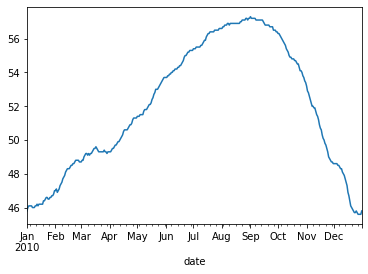

In [55]:
min_temp.plot()

# Question 3:
## Write the code necessary to visualize the maximum temperature over time.

In [56]:
max_temp = df.temp.resample('D').max()

<AxesSubplot:xlabel='date'>

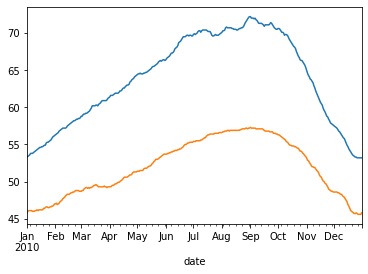

In [58]:
max_temp.plot()
min_temp.plot()

# Question 4 and 5:
## Which month is the coldest, on average? Which month has the highest average temperature?
- January
- September

In [59]:
temp_monthly = df.temp.resample('M').mean()

In [60]:
temp_monthly

date
2010-01-31    49.984140
2010-02-28    52.243899
2010-03-31    53.956528
2010-04-30    55.633056
2010-05-31    57.970968
2010-06-30    60.444722
2010-07-31    61.765457
2010-08-31    62.405376
2010-09-30    62.487083
2010-10-31    60.253091
2010-11-30    55.185139
2010-12-31    50.498253
Freq: M, Name: temp, dtype: float64

# Question 6:
## Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?


In [70]:
min_max_day = df.resample('D').temp.agg(['min', 'max'])
min_max_day['temp_change'] = min_max_day['max'] - min_max_day['min']

In [74]:
min_max_day[min_max_day.temp_change == min_max_day.temp_change.max()]

,min,max,temp_change
date,,,
2010-08-31,57.2,72.2,15.0


In [78]:
min_max_day.resample('M').temp_change.mean()

date
2010-01-31     8.341935
2010-02-28     9.485714
2010-03-31    10.854839
2010-04-30    12.320000
2010-05-31    12.909677
2010-06-30    13.950000
2010-07-31    13.977419
2010-08-31    13.870968
2010-09-30    14.403333
2010-10-31    13.432258
2010-11-30    10.236667
2010-12-31     7.925806
Freq: M, Name: temp_change, dtype: float64

#### Answer: Depending on the interpretation, if going based on average daily temp change then September has the highest average. If going based on single day highest temp change, august 31st had the highest temp change.